# Clasificador de Imagenes

## Proyecto materia tratamiento de datos

# Importar Librerías a Usar

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential,Input,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,BatchNormalization,LeakyReLU


2023-09-08 23:48:21.210764: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Cargar set de Imágenes para entrenamiento

In [2]:
imgpath = os.path.join(os.getcwd(), 'DataSet', 'train')

images = []
directories = []
dircount = []
cant=0

print("leyendo imagenes de desde: ",imgpath)

for root, dirnames, filenames in os.walk(imgpath, topdown=True):
    
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            img_rgb = plt.imread(filepath)
            images.append(img_rgb)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
                       
    if cant>0:
        print(root, cant)
        directories.append(root)
        dircount.append(cant)
        cant=0

print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de desde:  /home/ntrujillo/git-hub/meat-grader/DataSet/train
/home/ntrujillo/git-hub/meat-grader/DataSet/train/CLASS_03 213
/home/ntrujillo/git-hub/meat-grader/DataSet/train/CLASS_04 105
/home/ntrujillo/git-hub/meat-grader/DataSet/train/CLASS_05 949
/home/ntrujillo/git-hub/meat-grader/DataSet/train/CLASS_02 62
/home/ntrujillo/git-hub/meat-grader/DataSet/train/CLASS_07 204
/home/ntrujillo/git-hub/meat-grader/DataSet/train/CLASS_06 37
/home/ntrujillo/git-hub/meat-grader/DataSet/train/CLASS_08 63
Directorios leidos: 7
Imagenes en cada directorio [213, 105, 949, 62, 204, 37, 63]
suma Total de imagenes en subdirs: 1633


# Crear las etiquetas

In [3]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  1633


In [4]:
meat=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    meat.append(name[len(name)-1])
    indice=indice+1

0 CLASS_03
1 CLASS_04
2 CLASS_05
3 CLASS_02
4 CLASS_07
5 CLASS_06
6 CLASS_08


In [5]:
y = np.array(labels)
X = np.array(images)
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]


# Crear Sets de Entrenamiento y Test 80/20

In [6]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (1306, 216, 384, 3) (1306,)
Testing data shape :  (327, 216, 384, 3) (327,)


Text(0.5, 1.0, 'Ground Truth : 2')

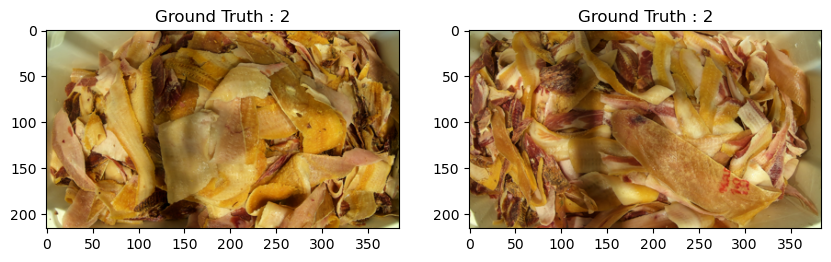

In [7]:
plt.figure(figsize=[10,10])

#Display the first image in training data
plt.subplot(1,2,1)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

#Display the first image in testing data
plt.subplot(1,2,2)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesar las imagenes

In [8]:
train_X = train_X.astype('float64')
test_X = test_X.astype('float64')

## One-hot Encoding para la red

In [9]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0. 0. 0.]


# Crear Set de Entrenamiento y Validación

In [10]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(1044, 216, 384, 3) (262, 216, 384, 3) (1044, 7) (262, 7)


# Crear el modelo de CNN

In [11]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 10 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria
altura, ancho = 216, 384 # altura y ancho de las imagenes

In [12]:
meat_model = Sequential()

meat_model.add(Convolution2D(32, kernel_size=(3, 3),activation='linear', padding='same', input_shape=(altura,ancho,3)))
meat_model.add(MaxPooling2D((2, 2),padding='same'))

meat_model.add(Convolution2D(64, kernel_size=(2, 2),activation='linear', padding='same'))
meat_model.add(MaxPooling2D((2, 2),padding='same')) 


meat_model.add(LeakyReLU(alpha=0.1))
meat_model.add(Flatten())
meat_model.add(Dense(256, activation='linear'))
meat_model.add(LeakyReLU(alpha=0.1))
meat_model.add(Dropout(0.5))
meat_model.add(Dense(nClasses, activation='softmax'))

2023-09-08 23:48:34.568880: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# Compilar el modelo

In [13]:
lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=INIT_LR,
    decay_steps=10000,
    decay_rate=0.9)
meat_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(learning_rate=lr_schedule),metrics=['accuracy'])

# Entrenar el modelo

In [14]:
meat_train = meat_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

Epoch 1/10
17/17 [==============================] - 63s 4s/step - loss: 8.4953 - accuracy: 0.5278 - val_loss: 0.8055 - val_accuracy: 0.7099
Epoch 2/10
17/17 [==============================] - 57s 3s/step - loss: 0.6379 - accuracy: 0.7787 - val_loss: 0.5829 - val_accuracy: 0.7557
Epoch 3/10
17/17 [==============================] - 57s 3s/step - loss: 0.4552 - accuracy: 0.8372 - val_loss: 0.5073 - val_accuracy: 0.8282
Epoch 4/10
17/17 [==============================] - 57s 3s/step - loss: 0.2930 - accuracy: 0.9042 - val_loss: 0.3843 - val_accuracy: 0.8397
Epoch 5/10
17/17 [==============================] - 56s 3s/step - loss: 0.2178 - accuracy: 0.9243 - val_loss: 0.3931 - val_accuracy: 0.8473
Epoch 6/10
17/17 [==============================] - 57s 3s/step - loss: 0.1326 - accuracy: 0.9598 - val_loss: 0.4835 - val_accuracy: 0.8435
Epoch 7/10
17/17 [==============================] - 57s 3s/step - loss: 0.0720 - accuracy: 0.9761 - val_loss: 0.2661 - val_accuracy: 0.9084
Epoch 8/10
17/17 [==

# Evaluar el modelo

In [15]:
test_eval = meat_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

11/11 [==============================] - 3s 301ms/step - loss: 0.4011 - accuracy: 0.8869
Test loss: 0.4010867774486542
Test accuracy: 0.8868501782417297


# Matriz de Confusión

11/11 [==============================] - 3s 286ms/step
0 -> CLASS_03
1 -> CLASS_04
2 -> CLASS_05
3 -> CLASS_02
4 -> CLASS_07
5 -> CLASS_06
6 -> CLASS_08


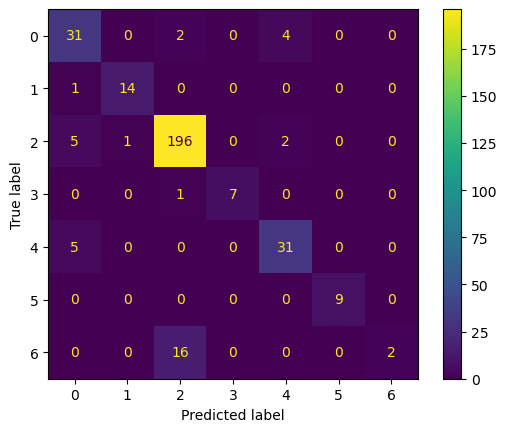

In [16]:
predicted_classes=[]
predicted_classes2 = meat_model.predict(test_X)

for predicted_meat in predicted_classes2:
    predicted_classes.append(predicted_meat.tolist().index(max(predicted_meat)))
predicted_classes=np.array(predicted_classes)

confusion_matrix = metrics.confusion_matrix(test_Y, predicted_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
for idx, x in enumerate(meat):
    print(idx,'->', x) 
cm_display.plot()


# Pruebas del modelo

In [17]:
from skimage.transform import resize

images=[]

filenames = ['DataSet/test/CLASS_07/17-CAPTURE_20220420_174411_517.png',
            'DataSet/test/CLASS_06/14-CAPTURE_20220531_144002_978.png',
            'DataSet/test/CLASS_06/22-CAPTURE_20220421_225004_317.png',
            'DataSet/test/CLASS_05/06-CAPTURE_20220614_064325_983.png',
            'DataSet/test/CLASS_05/13-CAPTURE_20220531_134852_338.png',
            'DataSet/test/CLASS_08/23-CAPTURE_20220421_234229_175.png',
            'DataSet/test/CLASS_02/10-CAPTURE_20220531_103237_465.png']


for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (altura, ancho),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

array_images = np.array(images)
test_images = array_images.astype('float64')

predictions = meat_model.predict(test_images)

for i, img_tagged in enumerate(predictions):
    print(filenames[i],' prediccion =>' ,meat[img_tagged.tolist().index(max(img_tagged))])

1/1 [==============================] - 0s 111ms/step
DataSet/test/CLASS_07/17-CAPTURE_20220420_174411_517.png  prediccion => CLASS_03
DataSet/test/CLASS_06/14-CAPTURE_20220531_144002_978.png  prediccion => CLASS_06
DataSet/test/CLASS_06/22-CAPTURE_20220421_225004_317.png  prediccion => CLASS_06
DataSet/test/CLASS_05/06-CAPTURE_20220614_064325_983.png  prediccion => CLASS_05
DataSet/test/CLASS_05/13-CAPTURE_20220531_134852_338.png  prediccion => CLASS_05
DataSet/test/CLASS_08/23-CAPTURE_20220421_234229_175.png  prediccion => CLASS_05
DataSet/test/CLASS_02/10-CAPTURE_20220531_103237_465.png  prediccion => CLASS_02
